In [1]:
import os
import sys
root = os.getcwd().split("data_science")[0]
sys.path.append(root)

from data_science.constants import *
from data_science.constants import Path
from data_science.constants import TypeCols
from data_science.utils.functions import castTypeCols, calculateVif, calculateVariance, selectKbest, stepWise, lassoRegression
import pandas as pd
from matplotlib import pyplot as plt

## Preparación de datos

In [11]:
# Carga de datos
data = pd.read_csv(root + Path.PATH.value + 'train_clean.csv')
data = castTypeCols(data)

# Target
target = data["SalePrice"]
data.drop(['SalePrice', 'Id'], axis=1, inplace=True)

# Dummies variables categóricas
data = pd.get_dummies(data=data, columns=TypeCols.CATEGORICAL.value)

# Selección de variables numéricas
cols_to_select = TypeCols.CONTINUOS.value + TypeCols.DISCRETE.value
df = data.loc[:, cols_to_select]

## Selección de Características

### Método VIF

In [12]:
# Variables eliminadas por el método VIF
cols_drop = [
    '2ndFlrSF', 'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'
]
df_vif = df.drop(columns=cols_drop)

In [13]:
calculateVif(data=df_vif).T

c:\Users\josea\Desktop\PROJECTS\house-prices\data_science\utils\functions.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result.fillna(0, inplace=True)


,VIF
LotFrontage,1.885116
LotArea,1.557269
MasVnrArea,1.357880
BsmtFinSF1,3.811792
BsmtUnfSF,2.961204
1stFlrSF,3.548968
LowQualFinSF,1.103291
GarageArea,2.052857
WoodDeckSF,1.202567
OpenPorchSF,1.191052


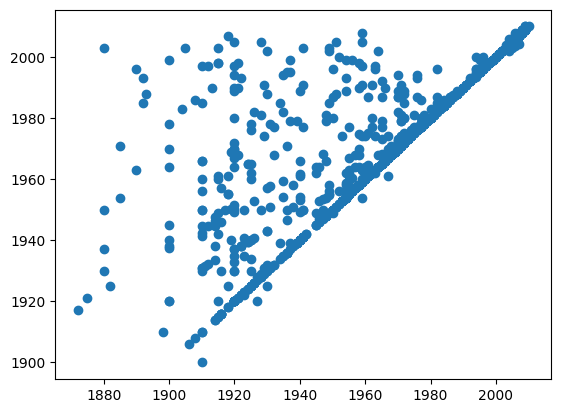

In [14]:
'''
    Colinealidad YearBuilt vs GarageYrBlt
    Parece que, aunque hay colinealidad, puede ser ambas características buenas predictoras
    En una fase inicial, decido conservar ambas variables
'''
tmp = df_vif.loc[:, ['YearBuilt', 'GarageYrBlt']]
plt.scatter(tmp.YearBuilt, tmp.GarageYrBlt)

### Baja Varianza de datos

In [15]:
df_var = calculateVariance(data=df_vif, threshold_value=0.20)

28 Variables originales:
26 Variables tras la selección:
Variables eliminadas: ['BsmtHalfBath', 'KitchenAbvGr']


In [16]:
'''
    No se elimina ninguna de las características, ya que tiene sentido su baja variabilidad. Y puede que su
    eliminación afecte al correcto funcionamiento del modelo.
''';

### Método KBest

In [17]:
df_kbest = selectKbest(data=df, target=target, k_value=28)

33 Variables originales:
28 Variables tras la selección:
Variables eliminadas: ['YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'YrSold']


In [18]:
df_var = calculateVariance(data=df_kbest, threshold_value=0.20)

28 Variables originales:
27 Variables tras la selección:
Variables eliminadas: ['BsmtHalfBath']


### Stepwise

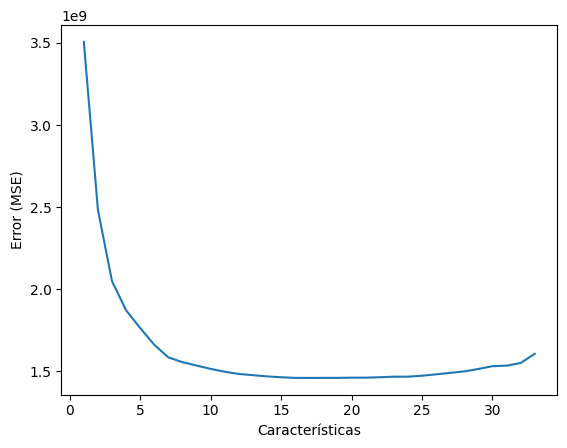

In [19]:
df_stepwise = stepWise(data=df, target=target)

### Método Lasso

In [20]:
tmp = lassoRegression(data=df, target=target, alpha=0.2)

-39.922
0.367
37.889
21.615
8.063
14.62
8.902
49.877
49.574
20.82
5.923
6.784
24.953
5.024
28.697
27.663
64.726
-40.984
0.014
385.267
475.941
7407.044
732.032
4955.076
-3391.074
-11619.172
-39616.087
7156.217
7318.344
-46.347
14002.379
322.162
-332.51
